## Testing the code for faraday rotation.

#### I will start with the basic picture first and then will make necessary changes to include singal with multiple frequencies after some clarifications.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### I started out with linear polarization. I tried doing with circular and elliptical polarization, but that was resulting in unexpected results. So, I am not sure if the procdure is same for all the processes.

10.0
1.0
1.0
pol angle is 45.0


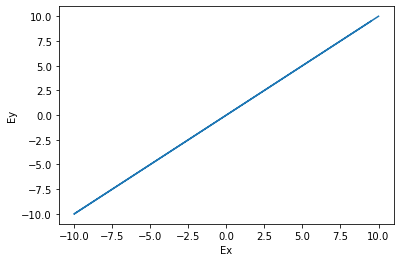

In [2]:
time = np.linspace(0.0,0.01,10**7,endpoint=False)
freq = 5e7
E0 = 10
Ex = E0*np.cos(2.0*np.pi*freq*time) 
Ey = E0*np.cos(2.0*np.pi*freq*time)
npts = len(time)
#AvgE = np.average(Ex)
pol = Ey/Ex  #Gives the tan(polarization angle)
plt.plot(Ex[0:1000],Ey[0:1000])
plt.xlabel("Ex")
plt.ylabel("Ey")
print(max(Ex))
print(Ey[1]/Ex[1])  # Just checking the numbers
print(Ey[4000]/Ex[4000])   # Just checking the numbers
print("pol angle is",np.arctan(Ey[5500]/Ex[5500])*180/np.pi)

#### Now I will fourier transform both the signals, which will result in both real and imaginary components for both the Ex and Ey, which are written into their respective varibles. Ef_xre ( real part of fourier transformed Ex) and so on.

In [3]:
norm = 2.0/npts
Ef_x = norm*np.fft.rfft(Ex)
Ef_y = norm*np.fft.rfft(Ey)

Ef_xre = Ef_x.real.copy()
Ef_xim = Ef_x.imag.copy()
Ef_yre = Ef_y.real.copy()
Ef_yim = Ef_y.imag.copy()
np.shape(Ef_x)

(5000001,)

#### Making the Covariant matrix of 4 elements, Real.Ex Im.Ex Re.Ey and Im.Ey in fourier space, which will result in a 4x4 covariance matrix.

In [4]:
data = np.array([Ef_xre,Ef_yre,Ef_xim,Ef_yim])
covmatrix = np.cov(data,bias=True)

In [5]:
print(covmatrix)

[[ 1.99999920e-05  1.99999920e-05 -1.95165802e-15 -1.95165802e-15]
 [ 1.99999920e-05  1.99999920e-05 -1.95165802e-15 -1.95165802e-15]
 [-1.95165802e-15 -1.95165802e-15  3.62946606e-25  3.62946606e-25]
 [-1.95165802e-15 -1.95165802e-15  3.62946606e-25  3.62946606e-25]]


In [6]:
I= 0.5*(covmatrix[0,0]+covmatrix[1,1]+covmatrix[2,2]+covmatrix[3,3])
Q = 0.5*(covmatrix[0,0]-covmatrix[1,1]+covmatrix[2,2]-covmatrix[3,3])
U = covmatrix[0,1]+covmatrix[3,2]
V = covmatrix[1,2]-covmatrix[0,3]

In [7]:
print(Q**2+U**2+V**2)
print(I**2)

3.9999967999967666e-10
3.9999967999967666e-10


#### The above number doesn't look good since they aren't normalized by Normalizing I to be 1, but the relation between stokes parameters still holds.


5000001
9.999999999999993


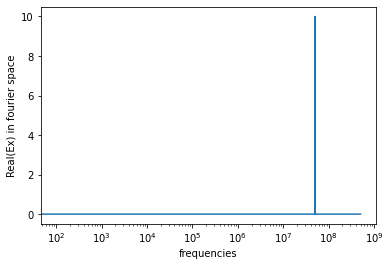

In [8]:
k = np.fft.rfftfreq(len(time))
kfreq = k*npts/(max(time)+time[1])  #Frequncies on the axis.
plt.semilogx(kfreq,Ef_x.real)
plt.xlabel("frequencies")
plt.ylabel("Real(Ex) in fourier space")
print(len(kfreq))
print(max(abs(Ef_x.real)))

In [9]:
kfreq[2]-kfreq[1]   #Grid size in fourier space

100.0

In [10]:
# Define change in angle here
c = 3e8

def faraday_rotation_angle(w):
    far_angle = 0.1*c**2/w**2
    return far_angle

In [11]:
for i in range(len(kfreq)):
    if abs(kfreq[i]-freq)<=10:
        far_rot = faraday_rotation_angle(kfreq[i])
        
### I used this method for selecting the frequncy to rotate the polarization angle since I was testing with just a single
### frequency. I will modify this to include various frequencies.
    

#### The main problem with including a combination of frequencies in the signal is understanding what condition to use to get the desired result. This I will think about or ask you on slack.

#### The below fields are the new fields in fourier space after they are rotated by the faraday rotation angle (far_rot).

In [12]:
Ef_xnew = (Ef_x*np.cos(far_rot)-Ef_y*np.sin(far_rot)).copy()
Ef_ynew = (Ef_x*np.sin(far_rot)+Ef_y*np.cos(far_rot)).copy()

In [13]:
Ef_xre_new = Ef_xnew.real.copy()
Ef_xim_new = Ef_xnew.imag.copy()
Ef_yre_new = Ef_ynew.real.copy()
Ef_yim_new = Ef_ynew.imag.copy()

4.542379730392937


Text(0, 0.5, 'Real(New Ex)')

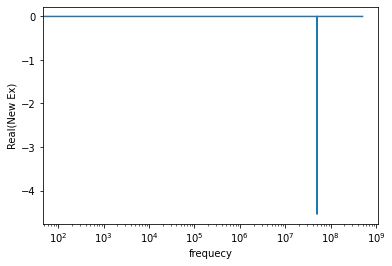

In [14]:
plt.semilogx(kfreq,Ef_xnew.real)
print(max(abs(Ef_xnew.real)))
plt.xlabel("frequecy")
plt.ylabel("Real(New Ex)")

max of new Ex is 4.542379730392941
max of New Ey is 13.392788596290005
pol angle is 71.26480624709637
pol angle is 1.2438055098076555
 difference between polarization angles 26.26480624709638


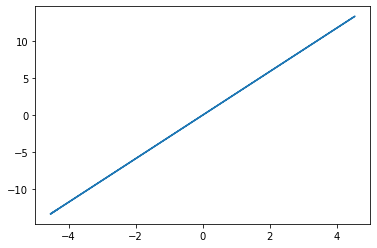

In [15]:
Ex_new = np.fft.irfft(Ef_xnew/norm)
Ey_new = np.fft.irfft(Ef_ynew/norm)
plt.plot(Ex_new[0:1000],Ey_new[0:1000])
print("max of new Ex is",max(Ex_new))
print("max of New Ey is",max(Ey_new))
print("pol angle is",np.arctan(Ey_new[5500]/Ex_new[5500])*180/np.pi)
print("pol angle is",np.arctan(Ey_new[5500]/Ex_new[5500]))

print(" difference between polarization angles",(np.arctan(Ey_new[5500]/Ex_new[5500])-np.arctan(Ey[5500]/Ex[5500]))*180/np.pi)

In [28]:
print(far_rot*180/np.pi-180)

26.264806247096402


#### The below covariance matrix is the second covariance matrix calculated after the rotation. And its components are from the fourier space.

In [18]:
data2 = np.array([Ef_xre_new,Ef_yre_new,Ef_xim_new,Ef_yim_new])
covmatrix2 = np.cov(data2,bias=True)

In [19]:
print(covmatrix2)

[[ 4.12664107e-06  1.21670214e-05 -4.02689768e-16 -1.18729372e-15]
 [ 1.21670214e-05  3.58733429e-05 -1.18729372e-15 -3.50062627e-15]
 [-4.02689768e-16 -1.18729372e-15  7.48875486e-26  2.20799045e-25]
 [-1.18729372e-15 -3.50062627e-15  2.20799045e-25  6.51005664e-25]]


In [20]:
I1= 0.5*(covmatrix2[0,0]+covmatrix2[1,1]+covmatrix2[2,2]+covmatrix2[3,3])
Q1 = 0.5*(covmatrix2[0,0]-covmatrix2[1,1]+covmatrix2[2,2]-covmatrix2[3,3])
U1 = covmatrix2[0,1]+covmatrix2[3,2]
V1 = covmatrix2[1,2]-covmatrix2[0,3]

In [29]:
print(Q1**2+U1**2+V1**2)
print(I1**2)

3.9999968000064457e-10
3.999996800008301e-10


#### The Q2 and U2 below are calculated using the rotation formula for stokes parameters taking their rotation by 2 times the rotation angle, and its clearly seen that, it matches to the ones calculated above. Hence showing that, if polarization is rotated by $\theta$, the 2nd and 3rd stokes parameters are rotated by $2\theta$.

In [30]:
Q2 = Q*np.cos(2*(far_rot))-U*np.sin(2*(far_rot))
U2 = Q*np.sin(2*(far_rot))+U*np.cos(2*(far_rot))
print("Stokes parameter Q using rotation formula",Q2)
print("Stokes parameter U using rotation formula",U2)

print("Stokes paramter Q using covariance matrix after rotation",Q1)
print("Stokes parameter U using covariance matrix after rotation",U1)

print("Stokes parameter Q using covariance matrix before rotation",Q)
print("Stokes parameter U using covariance matrix before rotation",U)

Stokes parameter Q using rotation formula -1.587335092763248e-05
Stokes parameter U using rotation formula 1.2167021423828671e-05
Stokes paramter Q using covariance matrix after rotation -1.5873350927656802e-05
Stokes parameter U using covariance matrix after rotation 1.2167021423836713e-05
Stokes parameter Q using covariance matrix before rotation 0.0
Stokes parameter U using covariance matrix before rotation 1.9999991999990316e-05


In [23]:
np.arctan(Q2/U2)

-0.9168146928204146

In [24]:
np.arctan(Q1/U1)

-0.9168146928208353

In [25]:
np.arctan(Q/U)

0.0

In [26]:
print(far_rot)

3.6000000000000005
